# Project: Gapminder Data Investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>Gapminder dataset is the data of the world, I have selected 3 measures to analys "life_expectency, population, and income/GDP" and this data is collected from 170 countries information in the period from 1800 till 2100, and till 2040 with GDP"income_PP", also for the years above our current date gapminder used forcasting just to visualize if-then scenario as per their documentation, also the data is collected from different sources at different versions and each version has its own period of time more detail about V26 that i am using:
### GDP 
>the unit used is stable which is PPP 2011 international US dollar price, and the period is up to 2100, i am using V26 which uses the world bank information from the period 1990 to 2018 and the period before world bank found in 1990 is collected from various sources:"Maddison Project Database, Penn World Table" PWT version9.1, Gapminder v25"
### Life Expectency
>This section of data is about the expected life span at birth and it is collected from 3 different sources as follows:"Period 1800-1970, main source: v7, by Mattias Lindgren - this one collected from 100 sources.
        "Period 1970-2016, main source: IHME"
        "Period 2017-2099, main source: UN"
###  Population
>This data contains two chuncks chunck 1 goes back till 10,000 BC "i didn't pick this option"
chunck 2 devided into 2 periods: -1800 to 1949 - used Maddison population data improved by CLIO INFRA in April 2015 and Gapminder v3  documented in greater detail by Mattias Lindgren
                                 -1950-2100 - used UN POP from their  World Population Prospects 2019 published in the file with annually interpolated demographic indicators, called WPP2019_INT_F01_ANNUAL_DEMOGRAPHIC_INDICATORS.xlsx, accessed on October 14, 2019.


> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [11]:
#importing Liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import html

%matplotlib inline


In [12]:
# fixing the display
pd.options.display.max_rows
pd.set_option('display.max_colwidth', None)

<a id='wrangling'></a>
## Data Wrangling

### Gathering data

In [13]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
#Loading each file in a DataFrame
income_pp = pd.read_csv("Dataset\Gapminder\income_per_person_gdppercapita_ppp_inflation_adjusted.csv")
life_exp = pd.read_csv("Dataset\Gapminder\life_expectancy_years.csv")
pop_tot = pd.read_csv("Dataset\Gapminder\population_total.csv")

In [14]:
#Taking a copy of the loaded data
income_pp_c = income_pp.copy()
life_exp_c = life_exp.copy()
pop_tot_c = pop_tot.copy()

In [15]:
income_pp_c.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
1,Albania,667,667,667,667,667,668,668,668,668,...,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300
2,Algeria,715,716,717,718,719,720,721,722,723,...,14300,14600,14900,15200,15500,15800,16100,16500,16800,17100
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73600,75100,76700,78300,79900,81500,83100,84800,86500,88300
4,Angola,618,620,623,626,628,631,634,637,640,...,6110,6230,6350,6480,6610,6750,6880,7020,7170,7310


In [16]:
life_exp_c.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,76.5,76.6,76.7,76.9,77.0,77.1,77.3,77.4,77.5,77.7
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.1,88.2,88.3
2,Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,88.3,88.4,88.5,88.6,88.7,88.8,88.9,89.0,89.1,89.2
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.7,78.9,79.0,79.1,79.3,79.4,79.5,79.7,79.8,79.9


In [17]:
pop_tot_c.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,76600000,76400000,76300000,76100000,76000000,75800000,75600000,75400000,75200000,74900000
1,Albania,400000,402000,404000,405000,407000,409000,411000,413000,414000,...,1330000,1300000,1270000,1250000,1220000,1190000,1170000,1140000,1110000,1090000
2,Algeria,2500000,2510000,2520000,2530000,2540000,2550000,2560000,2560000,2570000,...,70400000,70500000,70500000,70600000,70700000,70700000,70700000,70700000,70700000,70700000
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63000,62900,62900,62800,62700,62700,62600,62500,62500,62400
4,Angola,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,...,168000000,170000000,172000000,175000000,177000000,179000000,182000000,184000000,186000000,188000000


### Assessing income_pp_c
- this dataframe will be reshaped to have a column for country

In [18]:

#checking the head
income_pp_c.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
1,Albania,667,667,667,667,667,668,668,668,668,...,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300
2,Algeria,715,716,717,718,719,720,721,722,723,...,14300,14600,14900,15200,15500,15800,16100,16500,16800,17100
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73600,75100,76700,78300,79900,81500,83100,84800,86500,88300
4,Angola,618,620,623,626,628,631,634,637,640,...,6110,6230,6350,6480,6610,6750,6880,7020,7170,7310


In [19]:
#chekcing unique items
income_pp_c.nunique()

country    193
1800       163
1801       167
1802       162
1803       165
          ... 
2036       179
2037       180
2038       183
2039       182
2040       179
Length: 242, dtype: int64

In [20]:
income_pp_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Columns: 242 entries, country to 2040
dtypes: int64(241), object(1)
memory usage: 365.0+ KB


In [21]:
#checking duplicates
income_pp_c.duplicated().sum()

0

## Assessing life_exp_c
- This dataframe needs to be reshaped to have a column for country
> while reviewing this dataframe i noticed that it has some null values like the Andorra example but the mean of expextency will vary  for each year and if we considered Andorra it is a pretty small country and replacing the values with the mean for example will affect the analysis signeficuntly so i will leave them as is.

In [22]:
life_exp_c.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,...,184.000000,184.00000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.00000,184.000000
mean,31.502717,31.461957,31.478804,31.383152,31.459239,31.586413,31.644565,31.598370,31.383152,31.310326,...,83.758152,83.87663,83.996196,84.119022,84.236957,84.358152,84.478804,84.593478,84.71087,84.829891
std,3.814689,3.806303,3.938674,3.962376,3.934674,4.010884,4.110598,3.981247,4.087872,4.040580,...,5.600794,5.59444,5.589074,5.577601,5.570850,5.566060,5.556903,5.550234,5.54055,5.532609
min,23.400000,23.400000,23.400000,19.600000,23.400000,23.400000,23.400000,23.400000,12.500000,13.400000,...,67.100000,67.30000,67.400000,67.500000,67.600000,67.700000,67.800000,67.900000,68.00000,68.100000
25%,29.075000,28.975000,28.900000,28.900000,28.975000,29.075000,29.075000,29.075000,28.975000,28.875000,...,79.500000,79.70000,79.800000,79.900000,80.075000,80.200000,80.375000,80.475000,80.57500,80.775000
50%,31.750000,31.650000,31.550000,31.500000,31.550000,31.650000,31.750000,31.750000,31.550000,31.500000,...,84.200000,84.35000,84.450000,84.550000,84.650000,84.750000,84.850000,85.000000,85.15000,85.250000
75%,33.825000,33.900000,33.825000,33.625000,33.725000,33.825000,33.925000,33.925000,33.725000,33.625000,...,88.125000,88.22500,88.325000,88.500000,88.600000,88.700000,88.800000,88.900000,89.00000,89.100000
max,42.900000,40.300000,44.400000,44.800000,42.800000,44.300000,45.800000,43.600000,43.500000,41.700000,...,93.700000,93.90000,94.000000,94.100000,94.200000,94.300000,94.400000,94.500000,94.70000,94.800000


In [23]:
life_exp_c.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,76.5,76.6,76.7,76.9,77.0,77.1,77.3,77.4,77.5,77.7
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.1,88.2,88.3
2,Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,88.3,88.4,88.5,88.6,88.7,88.8,88.9,89.0,89.1,89.2
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.7,78.9,79.0,79.1,79.3,79.4,79.5,79.7,79.8,79.9


In [24]:
#checking info
life_exp_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 441.3+ KB


In [25]:
#checking values
life_exp_c.nunique()

country    187
1800       102
1801       101
1802       105
1803       104
          ... 
2096       129
2097       127
2098       128
2099       125
2100       127
Length: 302, dtype: int64

In [26]:
#checking na's
life_exp_c.isnull().any()

country    False
1800        True
1801        True
1802        True
1803        True
           ...  
2096        True
2097        True
2098        True
2099        True
2100        True
Length: 302, dtype: bool

In [27]:
#checking duplicates
life_exp_c.duplicated().sum()

0

In [28]:
life_exp_c.min()

country    Afghanistan
1800              23.4
1801              23.4
1802              23.4
1803              19.6
              ...     
2096              67.7
2097              67.8
2098              67.9
2099                68
2100              68.1
Length: 302, dtype: object

## Assessing pop_tot_c
- will be reshaped as to have a column for country

In [29]:
pop_tot_c.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,76600000,76400000,76300000,76100000,76000000,75800000,75600000,75400000,75200000,74900000
1,Albania,400000,402000,404000,405000,407000,409000,411000,413000,414000,...,1330000,1300000,1270000,1250000,1220000,1190000,1170000,1140000,1110000,1090000
2,Algeria,2500000,2510000,2520000,2530000,2540000,2550000,2560000,2560000,2570000,...,70400000,70500000,70500000,70600000,70700000,70700000,70700000,70700000,70700000,70700000
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63000,62900,62900,62800,62700,62700,62600,62500,62500,62400
4,Angola,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,...,168000000,170000000,172000000,175000000,177000000,179000000,182000000,184000000,186000000,188000000


In [30]:
#checking info
pop_tot_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 302 entries, country to 2100
dtypes: int64(301), object(1)
memory usage: 460.2+ KB


In [31]:
#checking na's
pop_tot_c.isnull().sum().sum()

0

In [32]:
#chekcing duplicates
pop_tot_c.duplicated().sum()

0

# Quality
> for this part data cleaning and tideness issues will be done on spot

#defining a function to automate meltting dataframes
dataframes = [pop_tot_c,life_exp_c,income_pp_c]
#id_vars = ["country"]
#var_name = ["year"]
value_nm = ""
df= ""
id_var= ""
var_nm= ""

def melt_vals(df,id_var,var_nm):
    while df not in dataframes:
        df = input("Kindly enter the name of the dataframe you wish to melt").lower().strip()
        if df in dataframes:
            break
    while id_var not in id_vars:
        id_var = input("Kindly enter the id_vars value for melt function").lower().strip()
        if id_var in id_vars:
            break
    while var_nm not in var_name:
        var_nm = input("'year' is the correct var_name for melt function").lower().strip()
        if var_nm in var_name:
            break
    value_name = input("enter a name for value_name for melt function").lower().strip()
    df = pd.melt(df, id_vars=id_var, var_name= var_nm, value_name= value_nm, ignore_index=True)

melt_vals(df,id_var,var_nm)

## Quality income_pp_c

## Tideness 
>reshaping this dataframe to have a column for year using melt function

In [23]:
#creating a column for year using melt function
income_pp_c = pd.melt(income_pp_c, id_vars= "country", var_name="year", value_name="income",ignore_index=True)

In [24]:
#conferming reshaping success
print(income_pp_c.head())
income_pp_c.shape

       country  year  income
0  Afghanistan  1800     603
1      Albania  1800     667
2      Algeria  1800     715
3      Andorra  1800    1200
4       Angola  1800     618


(46513, 3)

In [25]:
#checking dataframe
income_pp_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46513 entries, 0 to 46512
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  46513 non-null  object
 1   year     46513 non-null  object
 2   income   46513 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [26]:
#checking na's
income_pp_c.isnull().sum()

country    0
year       0
income     0
dtype: int64

In [27]:
#counting values
income_pp_c.value_counts().sort_values(ascending=False)

country      year  income
Afghanistan  1800  603       1
             1802  603       1
             1804  603       1
             1805  603       1
             1806  603       1
                            ..
Zimbabwe     2038  3020      1
             2019  2390      1
             1951  1190      1
             2018  2620      1
             2040  3140      1
Length: 46513, dtype: int64

## Quality life_exp_c
- expectency column has 759 null values but will be left as is for now

## Tideness 
- reshaping the dataframe to have a column for year using melt function

In [28]:
#reshaping dataframe using melt function
life_exp_c = pd.melt(life_exp_c, id_vars= "country", var_name="year", value_name="expectency",ignore_index=True)

In [29]:
#checking head after reshaping
life_exp_c.head()

,country,year,expectency
0,Afghanistan,1800,28.2
1,Albania,1800,35.4
2,Algeria,1800,28.8
3,Andorra,1800,NaN
4,Angola,1800,27.0


In [30]:
#confirm change
life_exp_c.isnull().sum()

country         0
year            0
expectency    759
dtype: int64

In [31]:
#checking info
#life_exp_c.info()
life_exp_c.head()

,country,year,expectency
0,Afghanistan,1800,28.2
1,Albania,1800,35.4
2,Algeria,1800,28.8
3,Andorra,1800,NaN
4,Angola,1800,27.0


## Quality pop_tot_c

## Tideness
- reshaping the dataframe to add a column for year

In [32]:
#reshaping the dataframe using melt function
pop_tot_c = pd.melt(pop_tot_c, id_vars= "country", var_name="year", value_name="population",ignore_index=True)

In [33]:
#confirm reshaping
pop_tot_c.head()

,country,year,population
0,Afghanistan,1800,3280000
1,Albania,1800,400000
2,Algeria,1800,2500000
3,Andorra,1800,2650
4,Angola,1800,1570000


## Merging the 3 Dataframes
- the 3 dataframes needs to be merged after reshaped them so the analysis is done in 1 dataframe with the features of the 3 measures 
- the result dataframe will have columns" country, year, income, expectency, and population"
- changing the dtype for the year column to be datetime

In [34]:
#first merging income and life_exp dataframes
income_life = pd.merge(income_pp_c, life_exp_c)

In [35]:
#confirming merge
income_life.head()

,country,year,income,expectency
0,Afghanistan,1800,603,28.2
1,Albania,1800,667,35.4
2,Algeria,1800,715,28.8
3,Andorra,1800,1200,NaN
4,Angola,1800,618,27.0


In [36]:
#merging the result dataframe with the third pop_tot_c to create comp_merge dataframe
comp_merge = pd.merge(income_life, pop_tot_c)

In [37]:
#checking the result of merging
print(comp_merge.head())
comp_merge.shape

       country  year  income  expectency  population
0  Afghanistan  1800     603        28.2     3280000
1      Albania  1800     667        35.4      400000
2      Algeria  1800     715        28.8     2500000
3      Andorra  1800    1200         NaN        2650
4       Angola  1800     618        27.0     1570000


(45067, 5)

In [38]:
#checking the columns types and null
comp_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45067 entries, 0 to 45066
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     45067 non-null  object 
 1   year        45067 non-null  object 
 2   income      45067 non-null  int64  
 3   expectency  44488 non-null  float64
 4   population  45067 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.1+ MB


In [39]:
#checking nan's expected to be at expectency and total is 579 after the merge
df1 = comp_merge[comp_merge.isna().any(axis=1)]

In [40]:
#checking nulls
comp_merge.isnull().sum()

country         0
year            0
income          0
expectency    579
population      0
dtype: int64

In [41]:
comp_merge.duplicated().any()

False

In [142]:
#changing the year column to datetime type
comp_merge.year = pd.to_datetime(comp_merge.year)

In [143]:
comp_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45067 entries, 0 to 45066
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   country     45067 non-null  object        
 1   year        45067 non-null  datetime64[ns]
 2   income      45067 non-null  int64         
 3   expectency  44488 non-null  float64       
 4   population  45067 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 2.1+ MB


# Important to check this part
> **************

In [145]:
#chekcin Qatar for the issue that some countries have many enteries for the same year

bruni = comp_merge[comp_merge.country == "Brunei"]

brunei

,country,year,income,expectency,population
24,Brunei,1800,1510,29.2,2260
211,Brunei,1801,1510,29.2,2260
398,Brunei,1802,1510,29.2,2260
585,Brunei,1803,1510,29.2,2260
772,Brunei,1804,1510,29.2,2260
...,...,...,...,...,...
44156,Brunei,2036,98900,77.9,483000
44343,Brunei,2037,101000,78.1,485000
44530,Brunei,2038,103000,78.2,486000
44717,Brunei,2039,105000,78.3,488000


In [150]:
#Qatar
qatar = comp_merge[comp_merge.country == "Qatar"]
qatar

,country,year,income,expectency,population
136,Qatar,1800-01-01,1100,30.8,14100
323,Qatar,1801-01-01,1100,30.8,14100
510,Qatar,1802-01-01,1110,30.8,14100
697,Qatar,1803-01-01,1110,30.8,14100
884,Qatar,1804-01-01,1110,30.8,14100
...,...,...,...,...,...
44268,Qatar,2036-01-01,165000,83.0,3530000
44455,Qatar,2037-01-01,169000,83.2,3550000
44642,Qatar,2038-01-01,172000,83.3,3580000
44829,Qatar,2039-01-01,176000,83.5,3600000


In [152]:
#united arab emirates
uae = comp_merge[comp_merge.country == "United Arab Emirates"]
uae

,country,year,income,expectency,population
176,United Arab Emirates,1800-01-01,998,30.7,40200
363,United Arab Emirates,1801-01-01,1000,30.7,40200
550,United Arab Emirates,1802-01-01,1010,30.7,40200
737,United Arab Emirates,1803-01-01,1010,30.7,40200
924,United Arab Emirates,1804-01-01,1010,30.7,40200
...,...,...,...,...,...
44308,United Arab Emirates,2036-01-01,73700,75.9,10700000
44495,United Arab Emirates,2037-01-01,75200,76.0,10700000
44682,United Arab Emirates,2038-01-01,76700,76.1,10700000
44869,United Arab Emirates,2039-01-01,78300,76.3,10700000


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 
- Does certain country grow better than others in those 3 metrics?

In [146]:
#created 3 dataframes for each of the top countries and want to check them in the next 3 cells and those will be the 3 countries that has a high
# bars at the first scatter at the viz part
qatar.describe()

,income,expectency,population
count,241.000000,241.000000,2.410000e+02
mean,40118.340249,46.267635,4.853402e+05
std,58636.934469,20.564965,1.017468e+06
min,1080.000000,24.800000,1.400000e+04
25%,1290.000000,30.600000,1.410000e+04
50%,2080.000000,30.800000,1.880000e+04
75%,87200.000000,67.400000,2.240000e+05
max,179000.000000,83.600000,3.630000e+06


In [147]:
uae.describe()

,income,expectency,population
count,241.000000,241.000000,2.410000e+02
mean,27927.626556,44.985477,1.715277e+06
std,44253.798654,18.751873,3.419600e+06
min,998.000000,25.900000,3.970000e+04
25%,1210.000000,30.700000,4.020000e+04
50%,1760.000000,31.300000,5.310000e+04
75%,63500.000000,69.300000,1.020000e+06
max,179000.000000,76.400000,1.070000e+07


In [148]:
brunei.describe()

,income,expectency,population
count,241.000000,241.000000,241.000000
mean,35839.128631,46.297925,116219.626556
std,43169.997313,19.491561,160226.969742
min,1510.000000,26.800000,2260.000000
25%,1740.000000,29.200000,5190.000000
50%,2130.000000,34.400000,26800.000000
75%,81500.000000,67.000000,194000.000000
max,166000.000000,78.500000,489000.000000


In [62]:
#checking the value counts for the comp_merge dataframe
comp_merge.value_counts().sort_index()

country      year  income  expectency  population
Afghanistan  1800  603     28.2        3280000       1
             1801  603     28.2        3280000       1
             1802  603     28.2        3280000       1
             1803  603     28.2        3280000       1
             1804  603     28.2        3280000       1
                                                    ..
Zimbabwe     2036  2900    66.0        19500000      1
             2037  2960    66.2        19900000      1
             2038  3020    66.4        20200000      1
             2039  3080    66.6        20500000      1
             2040  3140    66.8        20900000      1
Length: 44488, dtype: int64

In [138]:
comp_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45067 entries, 0 to 45066
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   country     45067 non-null  object        
 1   year        45067 non-null  datetime64[ns]
 2   income      45067 non-null  int64         
 3   expectency  44488 non-null  float64       
 4   population  45067 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 2.1+ MB


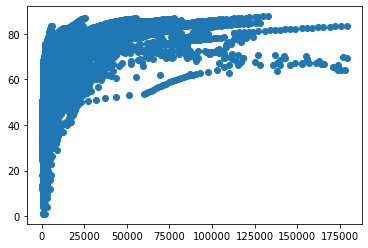

In [44]:
#plotting income vs life expectency 

fig, ax = plt.subplots()
ax.scatter(comp_merge["income"], comp_merge["expectency"])
plt.show()

- from the viz above it seems that some countries made a leap with income and kept increaseing even at forcasted years


- the following plot showing that the income of the world had a high increase at the mid of the past century then dropped and expectd it will have increase again at the forcasted period

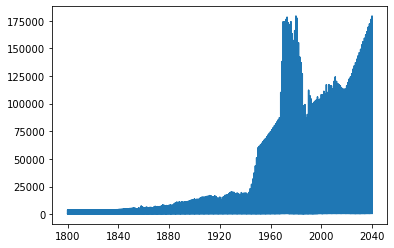

In [149]:
plt.plot(comp_merge.year, comp_merge.income)
plt.show()

- from the viz above it seems that the expectency and the income has no relation in some countries the 2 measures are growing together and in other countries it is not, specialy when this country has a tension period or a major event like "Armenia, Bosnia" example in the period from 1992 - 1994 there was a major GDP drop but expectency didn't follow that drop and continued to grow another example is "Australia" which seems to have nearly stable GDP and income both are very close and continue together till 2020 Also the Brunei example is pretty enteresting they had pretty high GDP start from mid 50's till mid 90's then the GDP stayed at a tight range till 2020 while expectency didn't see much change.

<a id='conclusions'></a>
## Conclusions

- From my data exploration i have found that there is no correlation between the metrics i have found as each country has its own pattern and major events to affect its metrics.
- there is universal major events that will affect the whole world like WW1 at 1918.
- some countries will have increase at GDP for a while then the population will keep growing and the GDP will be stable or ranged in a tight frame of values, and some other countries will have the opposite patterns.
- Each countries has its own patterns and expectations unless major event can affect a region " some neaboure countries".
## limitation
### Data it built on countries and has no region if there is a region it will be better for a analysis and to better observe major events that will affect the metrics instead of having each country seperatly, like this it doesn't give much of insights.